In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
# read the dataset
df = pd.read_csv('Datasets/height-weight.csv')

In [50]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

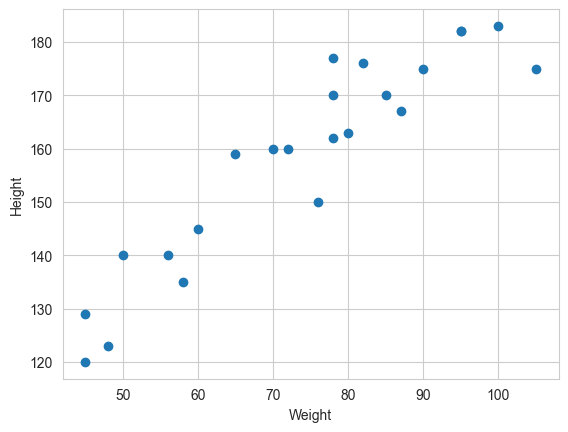

In [51]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [52]:
# Divide our dataset into independent and dependent feature
X = df[['Weight']] #must be a 2d array/dataset so use [[]]
y = df['Height'] #can be series

In [53]:
#Split dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [55]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [56]:
#Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

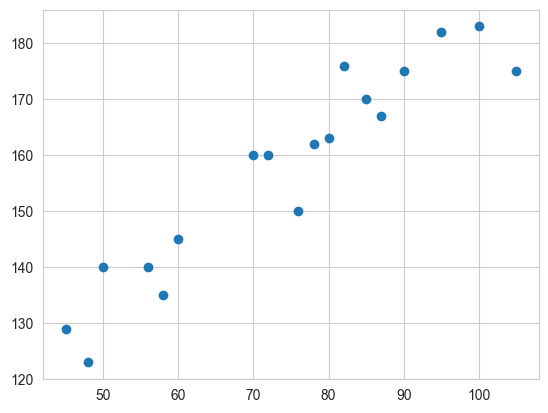

In [57]:
plt.scatter(X_train, y_train)

In [58]:
#Train the Simple Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.776986986042344


In [59]:
print('The slope or coefficient of weight is: ', model.coef_)
print("Intercept: ", model.intercept_)

The slope or coefficient of weight is:  [17.03440872]
Intercept:  157.5


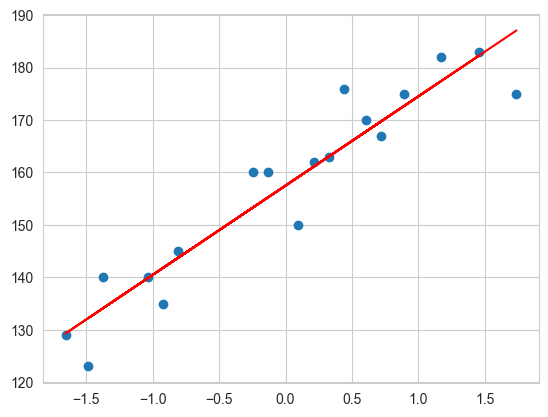

In [60]:
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, model.predict(X_train_scaled), 'r')

In [61]:
X_train.max()

Weight    105
dtype: int64

In [62]:
y_train.max()

np.int64(183)

## Performance Metrics
## MSE, MAE, RMSE
## R square and adjusted R square

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
score = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

In [64]:
print("Mean squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean squared Error: ", np.sqrt(mse))
print("Root Mean squared Error: ", root_mean_squared_error(y_test, y_pred))
print("R2 score: ", score)

Mean squared Error:  109.77592599051664
Mean Absolute Error:  9.822657814519232
Root Mean squared Error:  10.477400726827081
Root Mean squared Error:  10.477400726827081
R2 score:  0.776986986042344


## Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]

In [65]:
1- (1-score)*(len(y_test) - 1)/ (len(y_test) - X_test.shape[1] - 1)

0.7026493147231252

In [66]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
#new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

E:\udemy\PythonBootcamp\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [68]:
print(model.predict(scaled_weight))

[163.01076266]


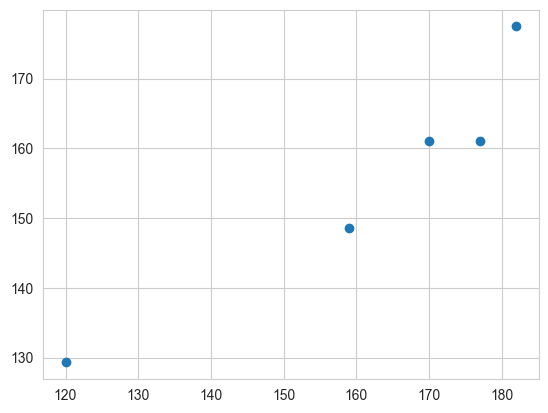

In [69]:
##Assumptions
##plot a scatter plot for the prediction
plt.scatter(y_test, y_pred)

In [70]:
##Residuals
residuals=y_test-y_pred

In [71]:
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

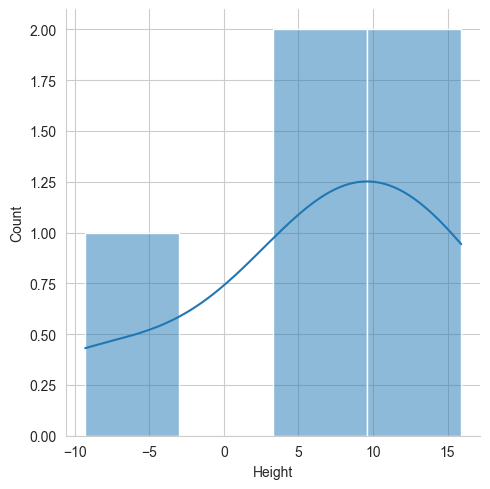

In [76]:
#plot the residuals
sns.displot(residuals, kde=True)

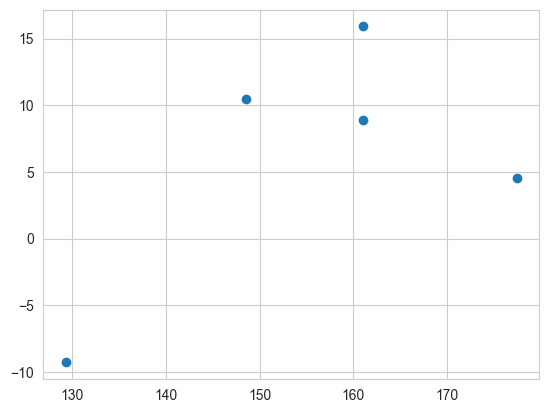

In [77]:
#Scatter plot with respect to prediction and residuals
#uniform distribution
plt.scatter(y_pred, residuals)